In [1]:
class Bandit:
    def __init__(self):
        self.arm_values = np.random.normal(0,1.2,10)       #arm_values 
        self.K = np.zeros(10)                            #10 arms
        self.est_values = np.zeros(10)                   # est_values 初始值 = 0 
        
    def get_reward(self,action):                        
        noise = np.random.normal(0,0.1)                      
        reward = self.arm_values[action]+noise
        return reward
    
    def choose_eps_greedy(self,epsilon):                
        rand_num = np.random.random()
        if epsilon >rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
        
    def update_est(self,action,reward):                  
        self.K[action]+=1
        alpha = 1./self.K[action]
        self.est_values[action]+=alpha *(reward - self.est_values[action])
        

In [2]:
def experiment(bandit,Npulls,epsilon):                        
    step_reward = []                                    
    avgacc_reward = [0]
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        step_reward.append(R)                                  
        avgacc_reward.append((i*avgacc_reward[-1]+R)/(i+1))  
    return [np.array(step_reward),np.array(avgacc_reward[1:])]
                     

In [3]:
import numpy as np
import matplotlib.pyplot as plt 


Nexp = 200            # 實驗次數
Npulls = 1000          #  搖臂次數
avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
avg_outcome_epsgreedy = np.zeros(Npulls)
avg_avgacc_eps0p0 = np.zeros(Npulls)
avg_avgacc_eps0p01 = np.zeros(Npulls)
avg_avgacc_eps0p1 = np.zeros(Npulls)
avg_avgacc_epsgreedy = np.zeros(Npulls)


for i in range(Nexp):
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0+= step_reword
    avg_avgacc_eps0p0 += avgacc_reword
    
    
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p01+= step_reword
    avg_avgacc_eps0p01 += avgacc_reword
    
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.01)
    avg_outcome_eps0p1+= step_reword
    avg_avgacc_eps0p1 += avgacc_reword
    
    '''if(Nexp<65):
        bandit = Bandit()
        [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
        avg_outcome_epsgreedy+= step_reword
        avg_avgacc_epsgreedy += avgacc_reword
    elif(Nexp<140):
        bandit = Bandit()
        [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.01)
        avg_outcome_epsgreedy+= step_reword
        avg_avgacc_epsgreedy += avgacc_reword
    elif(Nexp<200):
        bandit = Bandit()
        [step_reword, avgacc_reword] = experiment(bandit,Npulls,0)
        avg_outcome_epsgreedy+= step_reword
        avg_avgacc_epsgreedy += avgacc_reword'''
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1-i/1000)
    avg_outcome_epsgreedy+= step_reword
    avg_avgacc_epsgreedy += avgacc_reword

    
avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)
avg_outcome_epsgreedy /= np.float(Nexp)
avg_avgacc_eps0p0 /= np.float(Nexp)
avg_avgacc_eps0p01 /= np.float(Nexp)
avg_avgacc_eps0p1 /= np.float(Nexp)
avg_avgacc_epsgreedy /= np.float(Nexp)

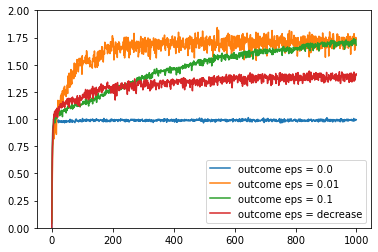

In [4]:
plt.plot(avg_outcome_eps0p0,label = "outcome eps = 0.0")
plt.plot(avg_outcome_eps0p01,label = "outcome eps = 0.01")
plt.plot(avg_outcome_eps0p1,label = "outcome eps = 0.1")
plt.plot(avg_outcome_epsgreedy,label = "outcome eps = decrease")

#plt.plot(avg_avgacc_eps0p0,label = "avgacc eps = 0.0")
#plt.plot(avg_avgacc_eps0p01,label = "avgacc eps = 0.01")
#plt.plot(avg_avgacc_eps0p1,label = "avgacc eps = 0.1")
plt.ylim(0,2)
plt.legend()
plt.show()